# Hooke's Law Experiment

## Introduction

### Hook's Law
A law stating that the strain  in a solid is proportional to the applied stress withinelastic limit of that solid.

Hooks law is a law of physics that states that the force needed to extend or compress a spring by some distance x scales linearly with respect to that distance.

that is where k is constantfactor characteristic of the spring: its **stiffness**, and x is small compare to the total possible deformation of the spring.

Hooks law states that the extent to which an elastic material will change size anshape under stress  is directly proportional to the amount of stress applied to it



### Force And Extension Relationship
 For a given spring an other elastic objects, the extension is directly proportional to the forceapplied.
 
 For example, if the force is doubled the extension doubles…
 
 In this instance therelationship between force and extension changes from being linear. Or directly proportional , tobeing non linear.

## Procedure

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

1. Data Preparation

we recorded two tables from experiment: displacment tables for
- steel
- copper

and the wires geometric:
- length
- diameter

also we know the expected young modulus of steel and copper

In [24]:
steel_wire_diameter_mm = 1.31  # Steel WireDiameter in mm
copper_wire_diameter_mm = 1.19  # Copper Wire Diameter in mm
original_steel_wire_length_mm = 1930.0  # Original steel wire length in mm
original_copper_wire_length_mm = 1950.0  # Original copper wire length in mm

steel_youngs_modulus_mpa = 200e3  # Expected Young's modulus for steel in MPa
copper_youngs_modulus_mpa = 110e3  # Expected Young's modulus for copper in MPa

load_values = np.array([20, 50, 70, 90, 110])  # Load values in N
# Because first applied 20N load to put the wire in tension, we subtract loads by 20N
# The plots wont make sense technically, but this will avoid lots of code overheads
load_values = load_values - 20

steel_df = pd.DataFrame(columns=["Load (N)", "Loading Displacement (mm)", "Unloading Displacement (mm)"])
copper_df = pd.DataFrame(columns=["Load (N)", "Loading Displacement (mm)", "Unloading Displacement (mm)"])


# Steel data
# We will multiply the recorded value in 0.01 because of readability
steel_loading_displacements = np.array([0, 10, 24.9, 29.8, 49.7]) * 0.01  # Loading displacements in mm for steel
steel_unloading_displacements = np.array([0, 10.6, 28, 38.5, 49.7]) * 0.01  # Unloading displacements in mm for steel

# Copper data
copper_loading_displacements = np.array([0, 131, 171, 203, 236]) * 0.01  # Loading displacements in mm for copper
copper_unloading_displacements = np.array([0, 168.5, 230, 234, 236]) * 0.01  # Unloading displacements in mm for copper

steel_df["Load (N)"] = load_values
steel_df["Loading Displacement (mm)"] = steel_loading_displacements
steel_df["Unloading Displacement (mm)"] = steel_unloading_displacements

copper_df["Load (N)"] = load_values
copper_df["Loading Displacement (mm)"] = copper_loading_displacements
copper_df["Unloading Displacement (mm)"] = copper_unloading_displacements


In [25]:
print("Steel Data:")
print(steel_df)
print("\nCopper Data:")
print(copper_df)

Steel Data:
   Load (N)  Loading Displacement (mm)  Unloading Displacement (mm)
0         0                      0.000                        0.000
1        30                      0.100                        0.106
2        50                      0.249                        0.280
3        70                      0.298                        0.385
4        90                      0.497                        0.497

Copper Data:
   Load (N)  Loading Displacement (mm)  Unloading Displacement (mm)
0         0                       0.00                        0.000
1        30                       1.31                        1.685
2        50                       1.71                        2.300
3        70                       2.03                        2.340
4        90                       2.36                        2.360


2. Calculations and Analysis functions

We need to calculate some values based on data
- stress
- strain
- Young modulus

- stress

stress is a physical quantity that describes forces present during deformation.

In [26]:
def calculate_stress(load_n: float, diameter_mm: float) -> float:
    """
    Calculates stress from load and diameter

    Args:
        load_n (float): Load in Newtons
        diameter_mm (float): Diameter in millimeters

    Returns:
        float: Stress in Megapascals (MPa)
    """
    area_mm2 = np.pi * (diameter_mm / 2) ** 2
    stress_mpa = load_n / area_mm2  # Convert from N/mm^2 to MPa
    return stress_mpa

- strain

strain is defined as relative deformation, compared to a reference position configuration.

In [27]:
def calculate_strain(displacement_mm: float, original_length_mm: float) -> float:
    """
    Calculates strain from displacement and original length

    Args:
        displacement_mm (float): Displacement in millimeters
        original_length_mm (float): Original length in millimeters

    Returns:
        float: Strain
    """
    strain = displacement_mm / original_length_mm
    return strain

- Young modulus

Young modulus is a mechanical property of solid materials that measures the tensile or compressive stiffness when the force is applied lengthwise.

In [28]:
def calculate_youngs_modulus(stress_mpa: np.ndarray, strain: np.ndarray) -> tuple[float]:
    """
    Calculates Young's modulus using linear regression

    Args:
        stress_mpa (np.ndarray): Array of stress values in MPa
        strain (np.ndarray): Array of strain values

    Returns:
        tuple
        slope (float): Young's modulus in MPa
        intercept (float)
    """
    coefficients = np.polyfit(strain, stress_mpa, deg=1)
    slope = coefficients[0]
    intercept = coefficients[1]

    return (slope, intercept)

yet we need another function for proceeding calculations

In [29]:
def combine_loading_unloading(loading_df, unloading_df):
    """
    Combines loading and unloading dataframes

    Args:
        loading_df (pd.DataFrame): DataFrame with loading data
        unloading_df (pd.DataFrame): DataFrame with unloading data

    Returns:
        pd.DataFrame: Combined DataFrame with loading and unloading data
    """
    combined_df = pd.concat([loading_df, unloading_df.iloc[::-1]], axis=1)  # Concatenate and reverse unloading order
    combined_df.columns = ["Load (N)", "Loading Displacement (mm)", "Unloading Displacement (mm)"]
    return combined_df

3. Visualizations functions

We have three types of plots
- the plot that shows real, expected and fitted line of each material displacment
- the plot that shows the materials comparison
- the plot that shows the loading and unloading

- real, expected and fitted line of each material displacment

In [30]:
def plot_stress_strain_diagram(dataframe, material, title):
    """
    Plots stress vs strain diagram with expected, real, and regression line

    Args:
        dataframe (pd.DataFrame): DataFrame containing load and displacement data
        material (str): Material name
        title (str): Plot title
    """
    original_length_mm = original_steel_wire_length_mm if material == "Steel" else original_copper_wire_length_mm

    dataframe["Stress (MPa)"] = calculate_stress(dataframe["Load (N)"], steel_wire_diameter_mm if  material == "Steel" else copper_wire_diameter_mm)
    dataframe["Strain"] = calculate_strain(dataframe["Loading Displacement (mm)"], original_length_mm)

    stress_mpa = dataframe["Stress (MPa)"].to_numpy()
    strain = dataframe["Strain"].to_numpy()

    slope, intercept = calculate_youngs_modulus(stress_mpa, strain)
    expected_stress = strain * steel_youngs_modulus_mpa if material == "Steel" else strain * copper_youngs_modulus_mpa

    plt.figure(figsize=(10, 6))
    plt.plot(strain, stress_mpa, marker='o', label=f"{material} (Real)")
    plt.plot(strain, expected_stress, label=f"{material} (Expected)")
    plt.plot(strain, slope * strain + intercept, linestyle="dashed", label=f"{material} (Regression)")
    plt.xlabel("Strain")
    plt.ylabel("Stress (MPa)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

- materials comparison

In [31]:
def plot_comparison_diagram(steel_df, copper_df, title):
    """
    Plots stress vs strain diagram comparing steel and copper

    Args:
        steel_df (pd.DataFrame): DataFrame for steel data
        copper_df (pd.DataFrame): DataFrame for copper data
        title (str): Plot title
    """
    steel_df["Stress (MPa)"] = calculate_stress(steel_df["Load (N)"], steel_wire_diameter_mm)
    steel_df["Strain"] = calculate_strain(steel_df["Loading Displacement (mm)"], original_steel_wire_length_mm)
    copper_df["Stress (MPa)"] = calculate_stress(steel_df["Load (N)"], copper_wire_diameter_mm)
    copper_df["Strain"] = calculate_strain(copper_df["Loading Displacement (mm)"], original_copper_wire_length_mm)

    steel_stress_mpa = steel_df["Stress (MPa)"].to_numpy()
    steel_strain = steel_df["Strain"].to_numpy()
    copper_stress_mpa = copper_df["Stress (MPa)"].to_numpy()
    copper_strain = copper_df["Strain"].to_numpy()

    plt.figure(figsize=(10, 6))
    plt.plot(steel_strain, steel_stress_mpa, marker='o', label="Steel")
    plt.plot(copper_strain, copper_stress_mpa, marker='o', label="Copper")
    plt.xlabel("Strain")
    plt.ylabel("Stress (MPa)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

- loading and unloading

In [32]:
def plot_loading_unloading_diagram(dataframe, material, title):
    """
    Plots loading and unloading curves for a material

    Args:
        dataframe (pd.DataFrame): DataFrame containing load and displacement data
        material (str): Material name
        title (str): Plot title
    """
    loading_df = dataframe[dataframe["Load (N)"] <= dataframe["Load (N)"].max()]
    unloading_df = dataframe[dataframe["Load (N)"] <= dataframe["Load (N)"].max()]

    plt.figure(figsize=(10, 6))
    plt.plot(loading_df["Load (N)"], loading_df["Loading Displacement (mm)"], marker='o', label=f"{material} (Loading)")
    plt.plot(unloading_df["Load (N)"][::-1], unloading_df["Unloading Displacement (mm)"][::-1], marker='o', label=f"{material} (Unloading)")  # Reverse for unloading
    plt.xlabel("Load (N)")
    plt.ylabel("Displacement (mm)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

4. Do the Job

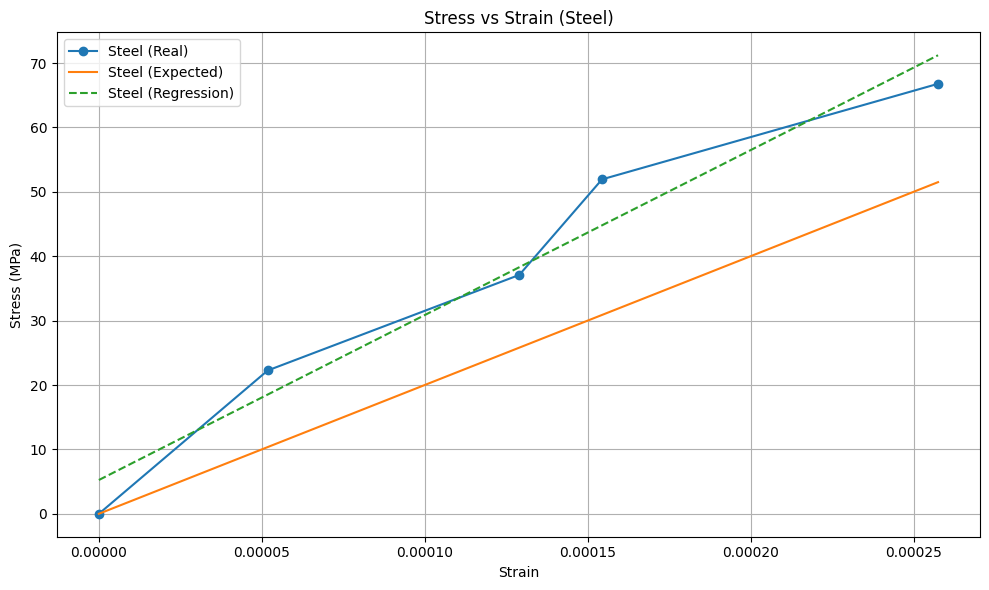

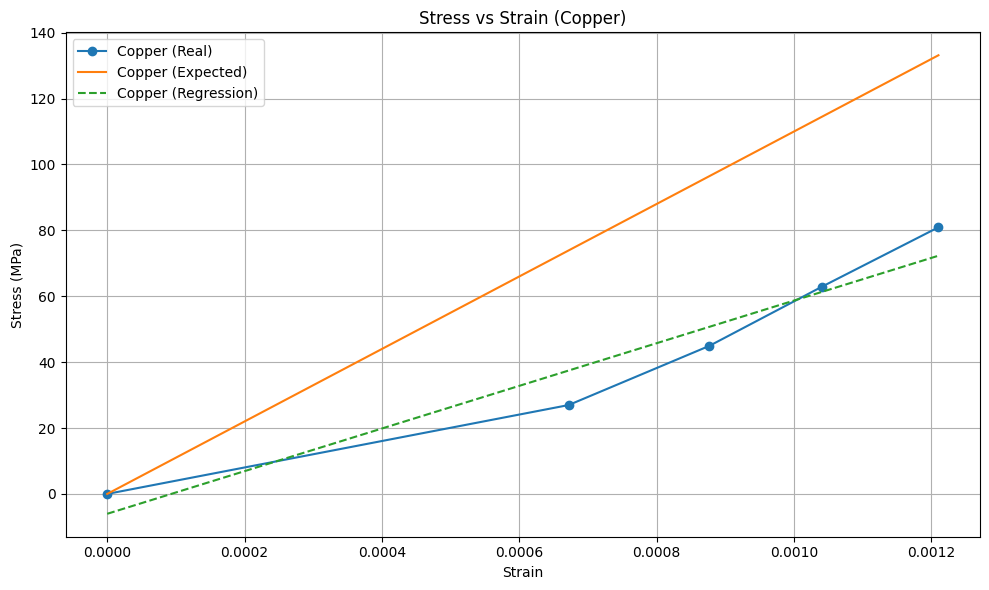

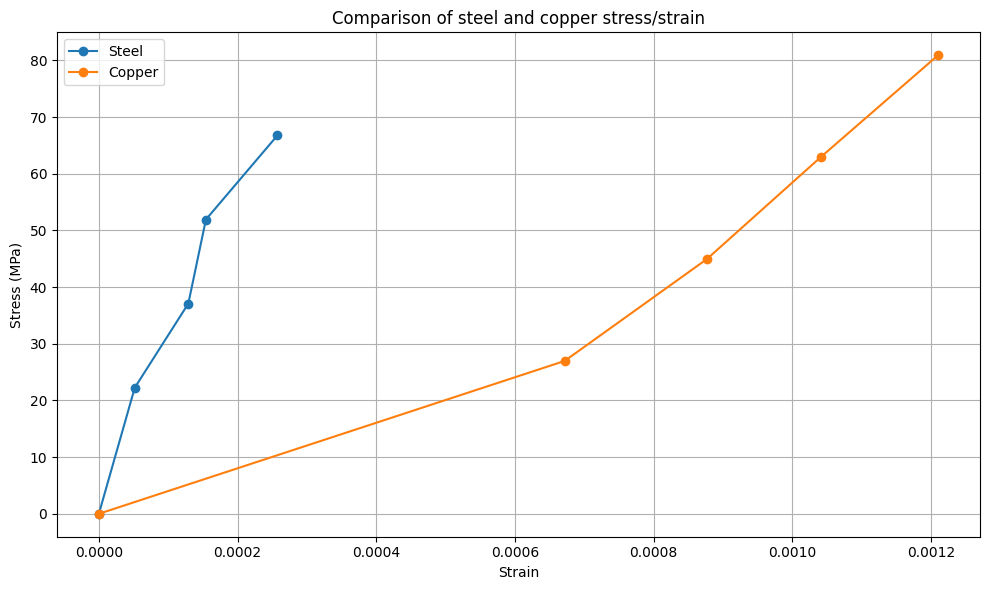

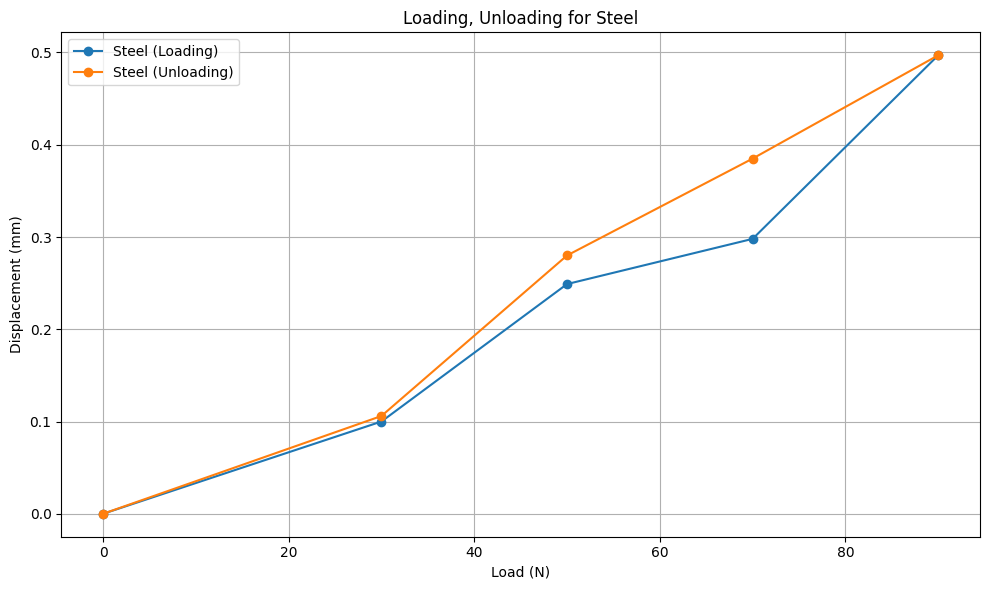

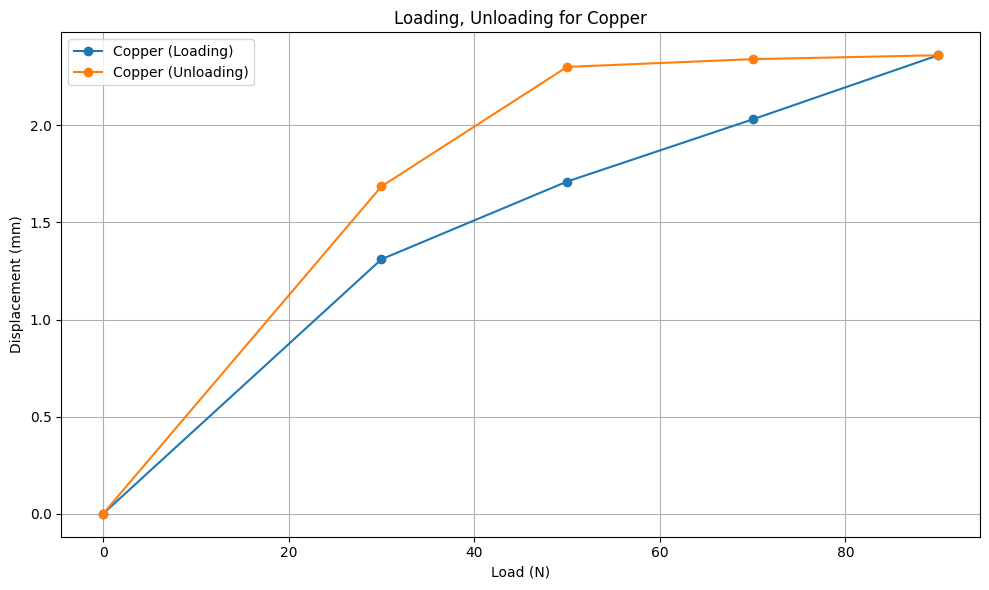

In [33]:
plot_stress_strain_diagram(steel_df.copy(), "Steel", "Stress vs Strain (Steel)")
plot_stress_strain_diagram(copper_df.copy(), "Copper", "Stress vs Strain (Copper)")
plot_comparison_diagram(steel_df.copy(), copper_df.copy(), title="Comparison of steel and copper stress/strain")
plot_loading_unloading_diagram(steel_df.copy(), material="Steel", title="Loading, Unloading for Steel")
plot_loading_unloading_diagram(copper_df.copy(), material="Copper", title="Loading, Unloading for Copper")